In [1]:
%matplotlib inline
import module
import module.function as F
import module.dataloader
from module.data import load_data_mnist
import module.nn as nn
import module.optim as optim
from module.train import train
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_iter, test_iter, num_inputs, num_cls = load_data_mnist()

Loading MNIST dataset. 60000 items for training, 10000 items for testing. batch_size=64
X size: 784, MNIST image scale 28x28, total_cls=10.


In [3]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs, activation='relu'):
        super(MLP, self).__init__()
        if activation == 'relu':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.ReLU(), F.Linear(num_hiddens, num_outputs), F.Softmax()]
        elif activation == 'sigmoid':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.Sigmoid(), F.Linear(num_hiddens, num_outputs), F.Softmax()]

## 激活函数：选择Relu还是Sigmoid?（结果显示选择Relu)

 20%|████████████████▍                                                                 | 10/50 [00:07<00:29,  1.36it/s]

result of epoch 10, train loss:1.051704398687796, train accuracy:83.52878464818764%
test loss:0.981160684390079, test accuracy:84.36504777070064%


 40%|████████████████████████████████▊                                                 | 20/50 [00:14<00:21,  1.36it/s]

result of epoch 20, train loss:0.6430566092789916, train accuracy:85.39778784648188%
test loss:0.6353970277730272, test accuracy:85.57921974522293%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:21<00:14,  1.39it/s]

result of epoch 30, train loss:0.5058515383925842, train accuracy:86.60880863539445%
test loss:0.49917741109640124, test accuracy:87.07205414012739%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:29<00:07,  1.37it/s]

result of epoch 40, train loss:0.44479860865335735, train accuracy:87.56663113006397%
test loss:0.463839654209661, test accuracy:87.29100318471338%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:36<00:00,  1.37it/s]

result of epoch 50, train loss:0.40844095633027905, train accuracy:88.3029051172708%
test loss:0.41670513537186676, test accuracy:88.56488853503186%


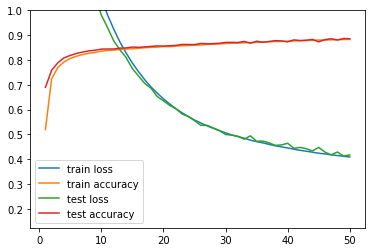

In [4]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:07<00:30,  1.32it/s]

result of epoch 10, train loss:1.0691641344248042, train accuracy:66.7977078891258%
test loss:1.005737530721799, test accuracy:68.57085987261146%


 40%|████████████████████████████████▊                                                 | 20/50 [00:15<00:22,  1.31it/s]

result of epoch 20, train loss:0.7608574514372598, train accuracy:76.3742670575693%
test loss:0.7270193129753658, test accuracy:77.54777070063695%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:22<00:15,  1.33it/s]

result of epoch 30, train loss:0.6387319998419853, train accuracy:80.33215618336888%
test loss:0.6148221603124937, test accuracy:81.30971337579618%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:30<00:07,  1.34it/s]

result of epoch 40, train loss:0.5682782083828221, train accuracy:82.6076092750533%
test loss:0.5491464933494385, test accuracy:83.04140127388536%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.33it/s]

result of epoch 50, train loss:0.5210189107490748, train accuracy:84.11347281449893%
test loss:0.5055407064520442, test accuracy:84.53423566878982%


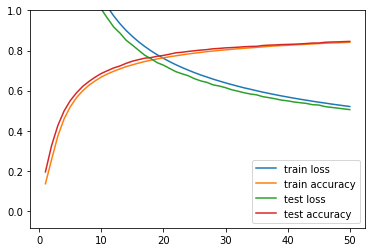

In [5]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'sigmoid'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

## 学习率：0.05还是0.1还是0.5？（结果显示选择0.5)

 20%|████████████████▍                                                                 | 10/50 [00:07<00:29,  1.34it/s]

result of epoch 10, train loss:1.046381117089291, train accuracy:81.0534381663113%
test loss:1.0005758285627004, test accuracy:81.92675159235668%


 40%|████████████████████████████████▊                                                 | 20/50 [00:14<00:22,  1.35it/s]

result of epoch 20, train loss:0.657150067576917, train accuracy:83.67204157782517%
test loss:0.6505029445872798, test accuracy:84.01671974522293%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:22<00:15,  1.32it/s]

result of epoch 30, train loss:0.5307881089449222, train accuracy:85.47607942430704%
test loss:0.5295354576088305, test accuracy:85.54936305732484%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:29<00:07,  1.36it/s]

result of epoch 40, train loss:0.4689983815005228, train accuracy:86.77038912579957%
test loss:0.4677087312568015, test accuracy:86.57444267515923%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.35it/s]

result of epoch 50, train loss:0.43273102603392644, train accuracy:87.59494936034116%
test loss:0.4472481618750105, test accuracy:86.7734872611465%


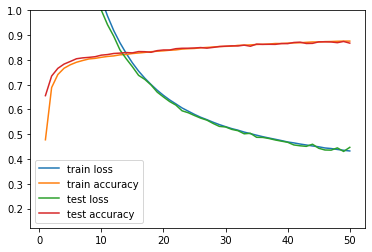

In [6]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:07<00:30,  1.33it/s]

result of epoch 10, train loss:0.6590791062188652, train accuracy:85.34614872068231%
test loss:0.6138825167712949, test accuracy:85.57921974522293%


 40%|████████████████████████████████▊                                                 | 20/50 [00:15<00:22,  1.34it/s]

result of epoch 20, train loss:0.4545047978416956, train accuracy:87.52665245202559%
test loss:0.4451138906658679, test accuracy:87.38057324840764%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:22<00:14,  1.36it/s]

result of epoch 30, train loss:0.3888899379243229, train accuracy:88.95255863539445%
test loss:0.4393343201412464, test accuracy:86.45501592356688%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:29<00:07,  1.40it/s]

result of epoch 40, train loss:0.35196689584266067, train accuracy:89.88372867803838%
test loss:0.3564977711394055, test accuracy:89.4406847133758%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.34it/s]

result of epoch 50, train loss:0.3270158431393398, train accuracy:90.47174840085287%
test loss:0.3441906848785582, test accuracy:89.80891719745223%


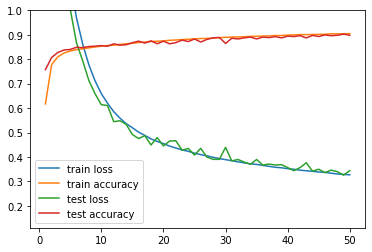

In [7]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.1, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:07<00:30,  1.31it/s]

result of epoch 10, train loss:0.3813643117712652, train accuracy:88.80097281449893%
test loss:0.38429655575454447, test accuracy:88.93312101910828%


 40%|████████████████████████████████▊                                                 | 20/50 [00:15<00:22,  1.35it/s]

result of epoch 20, train loss:0.2953797382383708, train accuracy:91.30963486140725%
test loss:0.32546700751759955, test accuracy:90.22691082802548%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:22<00:14,  1.35it/s]

result of epoch 30, train loss:0.25283784449566876, train accuracy:92.40904850746269%
test loss:0.3405828735179879, test accuracy:89.5999203821656%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:29<00:07,  1.37it/s]

result of epoch 40, train loss:0.22433553905573728, train accuracy:93.25193230277186%
test loss:0.24341918067640708, test accuracy:92.70501592356688%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.35it/s]

result of epoch 50, train loss:0.20365485414231266, train accuracy:93.92990405117271%
test loss:0.24198829670328098, test accuracy:92.63535031847134%


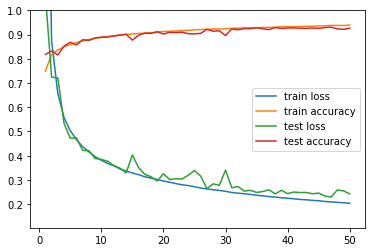

In [8]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

## 神经网络层数：64层还是128层还是256层？（结果显示选择256层）

 20%|████████████████▍                                                                 | 10/50 [00:07<00:29,  1.37it/s]

result of epoch 10, train loss:0.3613047794015609, train accuracy:89.53724680170576%
test loss:0.3601830026213449, test accuracy:89.45063694267516%


 40%|████████████████████████████████▊                                                 | 20/50 [00:14<00:22,  1.35it/s]

result of epoch 20, train loss:0.2804729446222583, train accuracy:91.82102878464818%
test loss:0.29242858807527305, test accuracy:91.3515127388535%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:21<00:14,  1.36it/s]

result of epoch 30, train loss:0.2398118495013711, train accuracy:92.9570895522388%
test loss:0.26596808574958736, test accuracy:92.37659235668791%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:29<00:07,  1.37it/s]

result of epoch 40, train loss:0.21269701945668817, train accuracy:93.7283448827292%
test loss:0.2349610634994771, test accuracy:93.22253184713377%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:36<00:00,  1.36it/s]

result of epoch 50, train loss:0.19345508427035113, train accuracy:94.36633795309169%
test loss:0.23287735082480218, test accuracy:93.27229299363057%


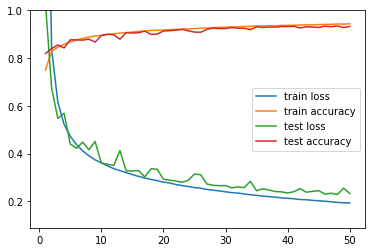

In [9]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:09<00:40,  1.01s/it]

result of epoch 10, train loss:0.3157049177637514, train accuracy:91.83935234541578%
test loss:0.38370814398559155, test accuracy:90.94347133757962%


 40%|████████████████████████████████▊                                                 | 20/50 [00:19<00:29,  1.03it/s]

result of epoch 20, train loss:0.214924998874693, train accuracy:93.86660447761194%
test loss:0.301829786805811, test accuracy:92.1875%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:29<00:19,  1.04it/s]

result of epoch 30, train loss:0.17503796674653022, train accuracy:94.82276119402985%
test loss:0.2706062173997644, test accuracy:92.84434713375796%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:38<00:09,  1.03it/s]

result of epoch 40, train loss:0.15057469219166597, train accuracy:95.48407515991471%
test loss:0.23989231296020194, test accuracy:93.95899681528662%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:48<00:00,  1.03it/s]

result of epoch 50, train loss:0.13334812533412538, train accuracy:95.97547974413646%
test loss:0.22720713399699977, test accuracy:94.33718152866241%


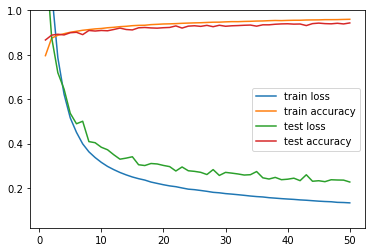

In [10]:
num_epochs, num_hiddens, lr, decay, activation = 50, 128, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:23<01:34,  2.37s/it]

result of epoch 10, train loss:0.31790476533583806, train accuracy:95.75726279317696%
test loss:0.6329902725258186, test accuracy:93.35191082802548%


 40%|████████████████████████████████▊                                                 | 20/50 [00:48<01:14,  2.48s/it]

result of epoch 20, train loss:0.13552116732019936, train accuracy:97.51965618336888%
test loss:0.5183968403426292, test accuracy:93.98885350318471%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:13<00:49,  2.48s/it]

result of epoch 30, train loss:0.07011155726176672, train accuracy:98.4241737739872%
test loss:0.48247725152707505, test accuracy:94.16799363057325%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:41<00:26,  2.61s/it]

result of epoch 40, train loss:0.0383695827428722, train accuracy:99.06882995735607%
test loss:0.48909033392225887, test accuracy:94.03861464968153%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:06<00:00,  2.52s/it]

result of epoch 50, train loss:0.021386800628587187, train accuracy:99.48694029850746%
test loss:0.4889097239846744, test accuracy:94.18789808917197%


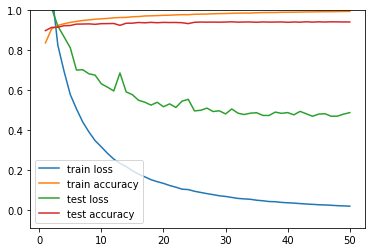

In [11]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

## 权重衰减：None还是1e-3还是1e-4还是1e-5？（结果显示选择1e-4）

 20%|████████████████▍                                                                 | 10/50 [00:25<01:45,  2.64s/it]

result of epoch 10, train loss:0.3199364229783987, train accuracy:95.80223880597015%
test loss:0.5649536511630057, test accuracy:93.86942675159236%


 40%|████████████████████████████████▊                                                 | 20/50 [00:52<01:16,  2.55s/it]

result of epoch 20, train loss:0.1436966534411351, train accuracy:97.38139658848614%
test loss:0.4562840264265029, test accuracy:94.6954617834395%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:17<00:51,  2.56s/it]

result of epoch 30, train loss:0.07403092904429166, train accuracy:98.33422174840085%
test loss:0.4549152833923688, test accuracy:94.43670382165605%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:42<00:24,  2.47s/it]

result of epoch 40, train loss:0.038878469546832405, train accuracy:99.04384328358209%
test loss:0.42452923209567744, test accuracy:94.88455414012739%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:07<00:00,  2.56s/it]

result of epoch 50, train loss:0.02227596247748228, train accuracy:99.49693496801706%
test loss:0.41818853020540625, test accuracy:94.89450636942675%


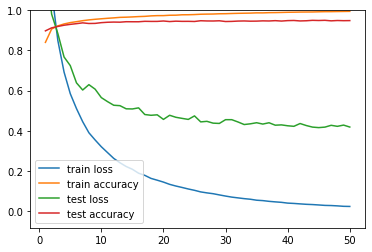

In [12]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:29<01:55,  2.89s/it]

result of epoch 10, train loss:0.26650036128657806, train accuracy:93.67503997867804%
test loss:0.2557655647290874, test accuracy:93.99880573248409%


 40%|████████████████████████████████▊                                                 | 20/50 [00:57<01:23,  2.79s/it]

result of epoch 20, train loss:0.25869147429897116, train accuracy:93.9632196162047%
test loss:0.24811330583587557, test accuracy:94.25756369426752%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:25<00:55,  2.80s/it]

result of epoch 30, train loss:0.25685648456950594, train accuracy:93.97488006396588%
test loss:0.24383280936408117, test accuracy:94.2078025477707%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:55<00:30,  3.06s/it]

result of epoch 40, train loss:0.25576301312927285, train accuracy:94.06649786780383%
test loss:0.24320481594416912, test accuracy:94.41679936305732%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:23<00:00,  2.88s/it]

result of epoch 50, train loss:0.25543149189582176, train accuracy:94.01819029850746%
test loss:0.2461948536937873, test accuracy:94.38694267515923%


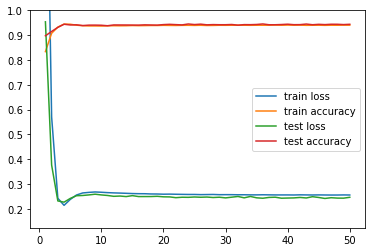

In [13]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, 1e-3, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:28<01:54,  2.86s/it]

result of epoch 10, train loss:0.3205282433340772, train accuracy:95.66897654584223%
test loss:0.545804687546517, test accuracy:93.75995222929936%


 40%|████████████████████████████████▊                                                 | 20/50 [00:58<01:32,  3.08s/it]

result of epoch 20, train loss:0.1282560504946589, train accuracy:97.37473347547974%
test loss:0.4412190853722666, test accuracy:94.50636942675159%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:28<01:00,  3.03s/it]

result of epoch 30, train loss:0.06088715557737604, train accuracy:98.38752665245202%
test loss:0.389900851087868, test accuracy:94.73527070063695%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:57<00:29,  2.94s/it]

result of epoch 40, train loss:0.03416549285536521, train accuracy:99.05883528784648%
test loss:0.36892901446368365, test accuracy:94.7750796178344%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:28<00:00,  2.96s/it]

result of epoch 50, train loss:0.020155860085630056, train accuracy:99.49860074626866%
test loss:0.3415658996724121, test accuracy:94.86464968152866%


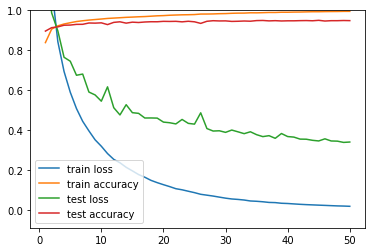

In [14]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, 1e-5, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:31<02:05,  3.14s/it]

result of epoch 10, train loss:0.1846242631625601, train accuracy:95.75892857142857%
test loss:0.31843942954697674, test accuracy:94.05851910828027%


 40%|████████████████████████████████▊                                                 | 20/50 [01:03<01:42,  3.43s/it]

result of epoch 20, train loss:0.07816832424125411, train accuracy:97.8344882729211%
test loss:0.151221445016106, test accuracy:95.60111464968153%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [01:33<00:57,  2.89s/it]

result of epoch 30, train loss:0.06941696077123333, train accuracy:98.29091151385929%
test loss:0.11347967750133948, test accuracy:96.63614649681529%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:02<00:28,  2.82s/it]

result of epoch 40, train loss:0.06662917875903687, train accuracy:98.49580223880598%
test loss:0.09551904229300062, test accuracy:97.17356687898089%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:29<00:00,  3.00s/it]

result of epoch 50, train loss:0.06491260265675192, train accuracy:98.6224013859275%
test loss:0.08797658775887132, test accuracy:97.45222929936305%


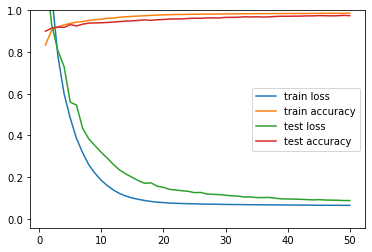

In [15]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, 1e-4, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, weight_decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

In [16]:
import pickle
with open('./model/mnist_model.pkl','wb') as f:
    pickle.dump(mlp, f)